# Start by importing the **JsonMidiCreator** library

In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter/[project]" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

## Write basic Chord progression

Example taken from: https://medium.com/pragmatic-sound/create-an-effective-melody-8ff0a89ab7ba

In [2]:
clip_chords = Chord("A", Scale("minor")) / Chord("F", Scale("Major")) / Chord("C", Scale("Major")) / Chord("G", Scale("Major"))

In [3]:
clip_chords << Foreach(2, 0, 1, 0)**Inversion() << Foreach(1, 2, 2, 2)**Octave()

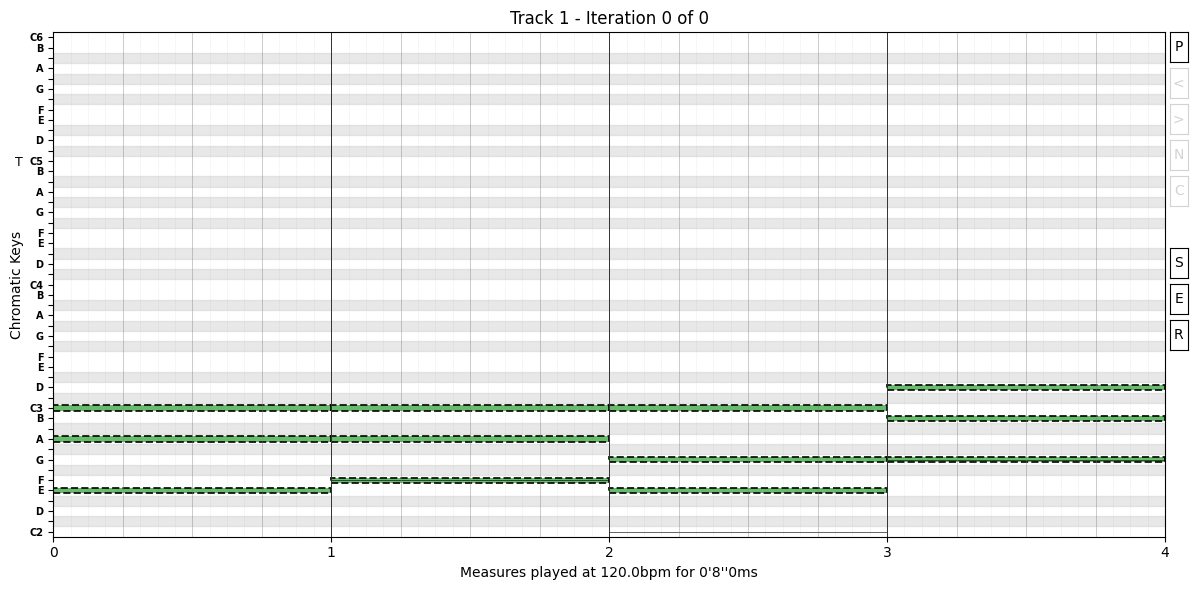

In [4]:
clip_chords >> Plot()

In [5]:
# Here the usage of ~ makes a copy of clip_chords
clip_bass = ~clip_chords << Octave(1) << Size(1) << Inversion(0)

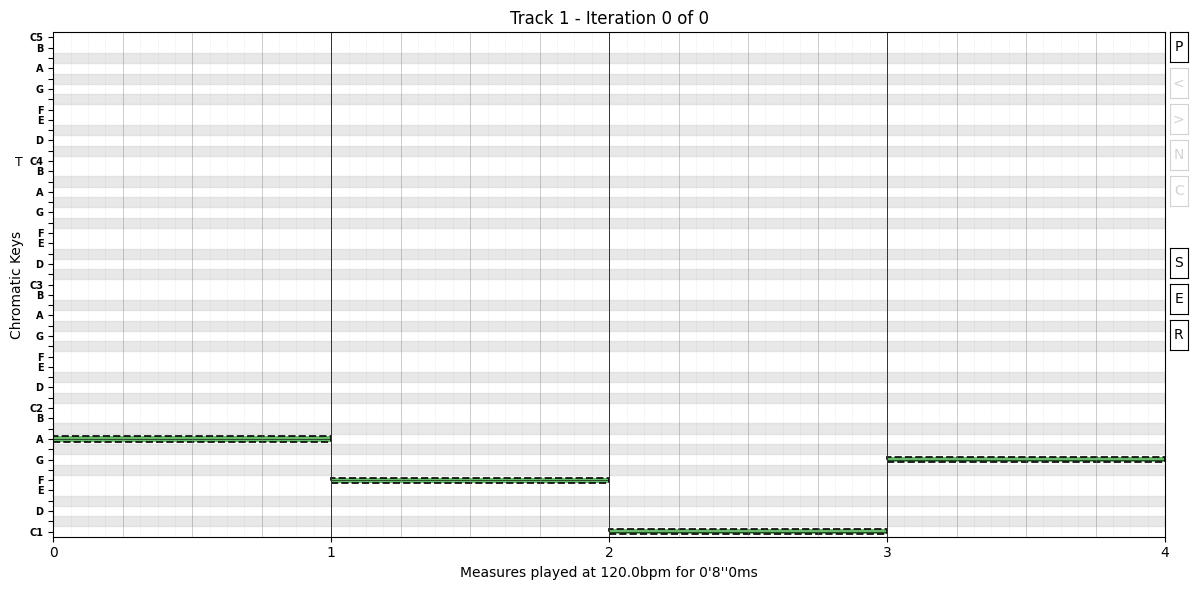

In [6]:
clip_bass >> Plot()

In [7]:
clip_togehter = clip_chords + clip_bass

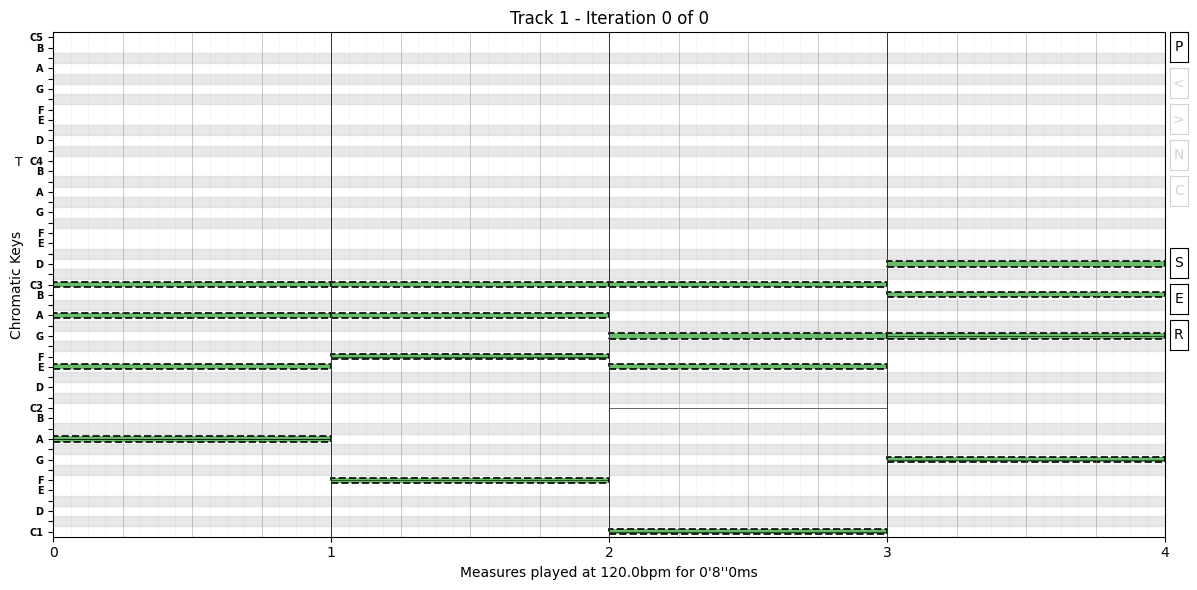

In [8]:
clip_togehter >> Plot()

In [9]:
clip_melody = ~clip_bass << Foreach(3, 3, 4, 3)**Octave()

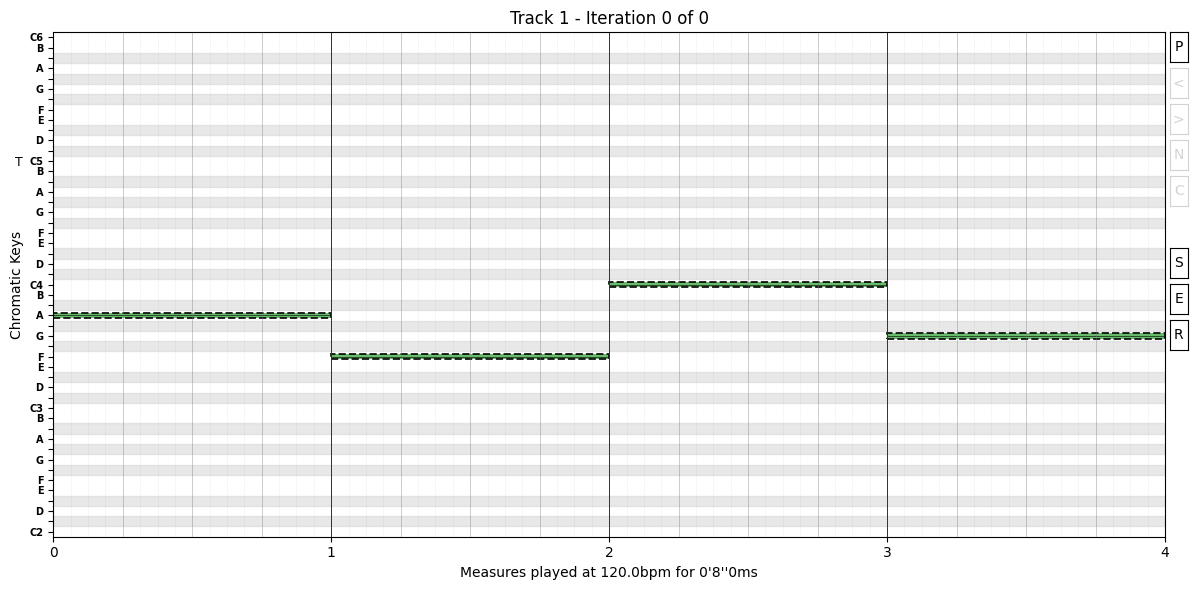

In [10]:
clip_melody >> Plot()

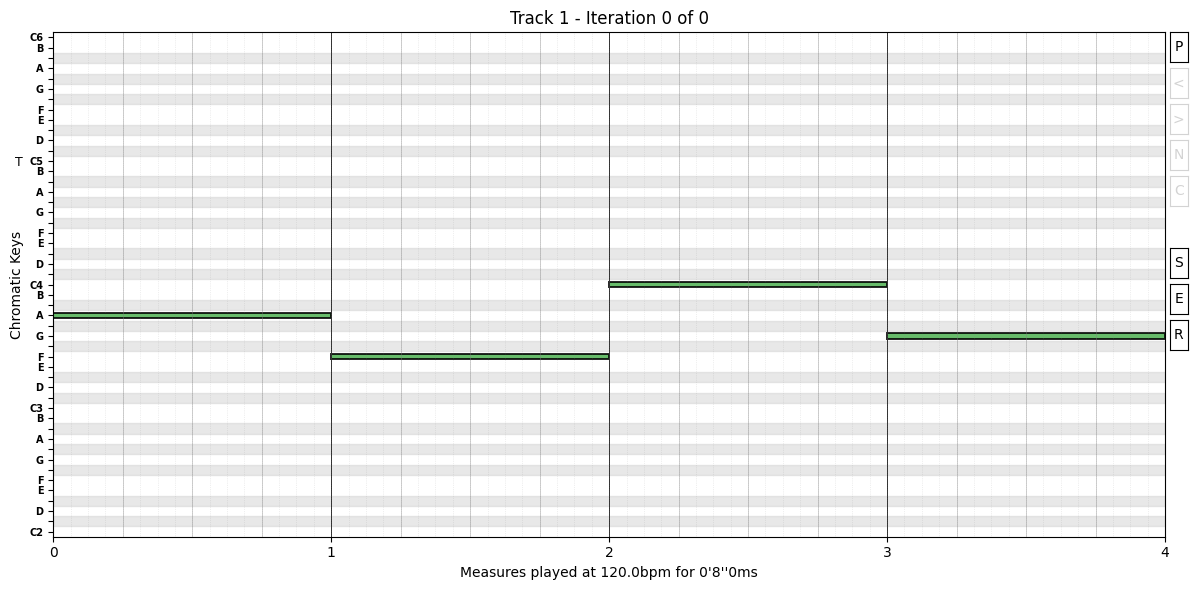

In [11]:
# `decompose` makes all `Chord` elements become a single note each
clip_melody.decompose() >> Plot()

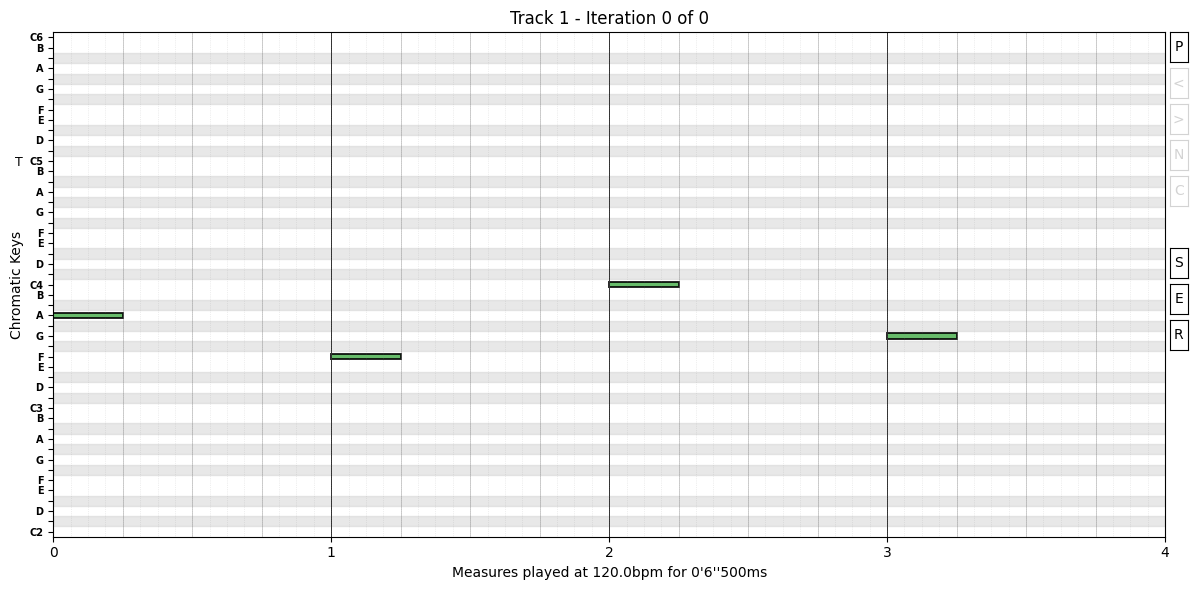

In [12]:
clip_melody / Length(4) >> Plot()

## Developing melody with Frames only

In [13]:
# The operator // on `Length` is the number of divisions, fragments of the resultant `Element` `Length`
framed_melody = clip_melody // Length(4)

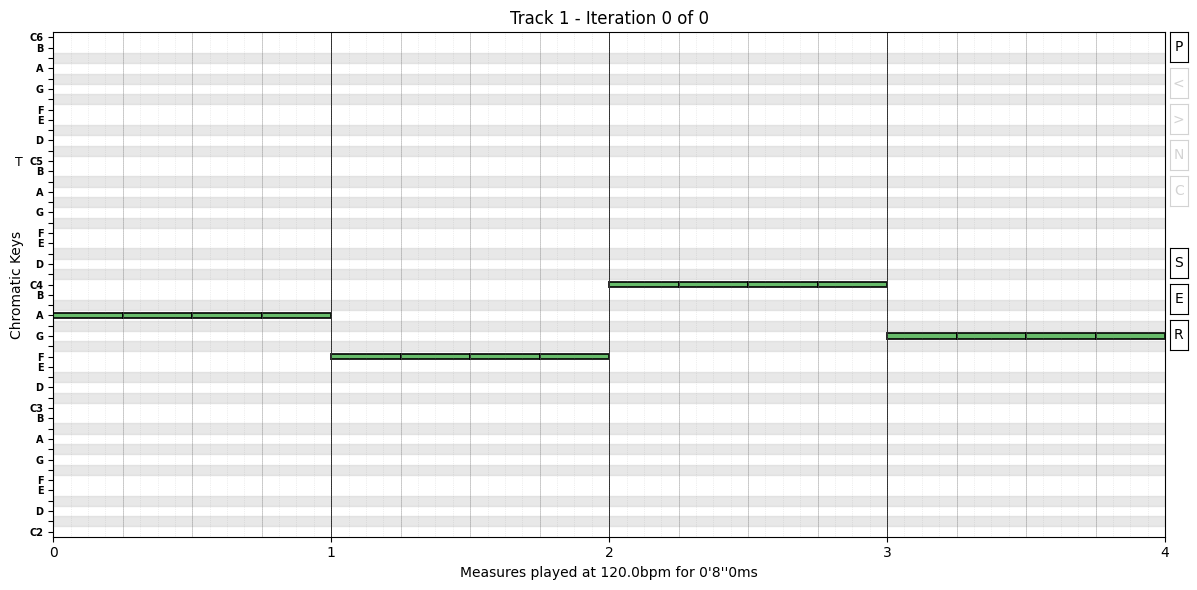

In [14]:
framed_melody >> Plot()

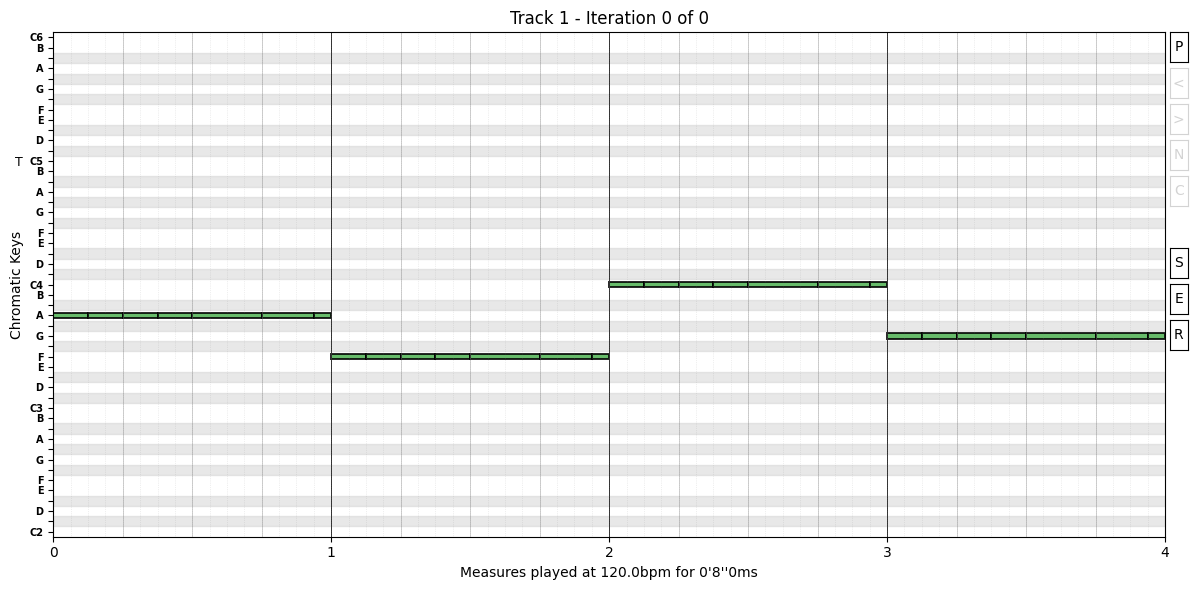

In [15]:
framed_melody //= Less(Beat(2))**Length(2)
framed_melody //= Step(15)
framed_melody >> Plot()

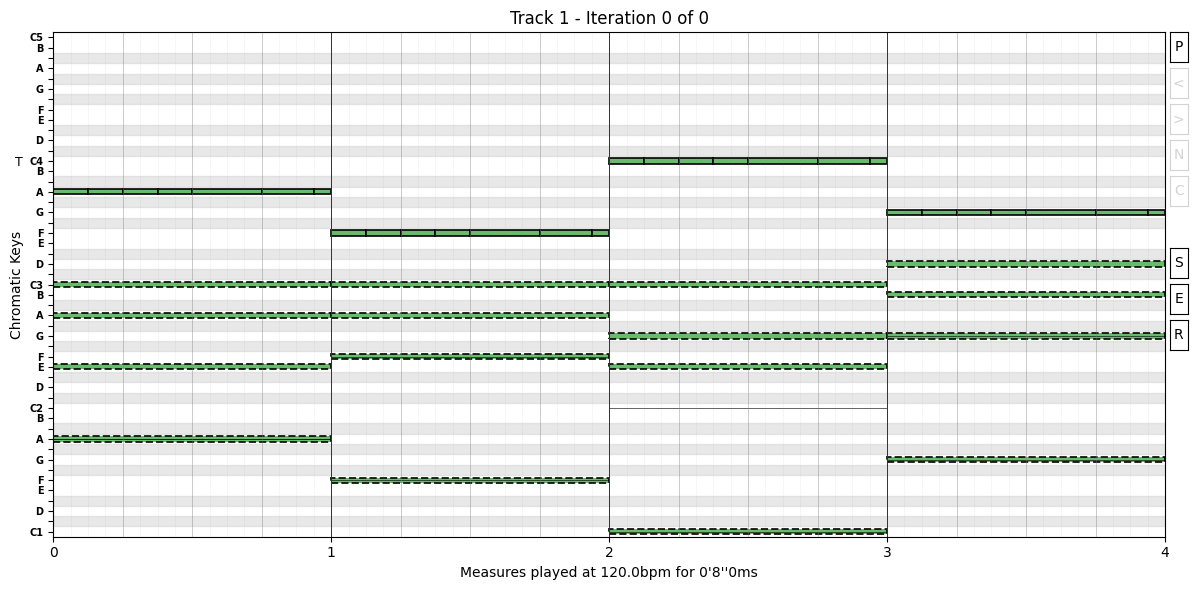

In [16]:
clip_togehter + framed_melody >> Plot()

## Developing melody with a Mask

In [17]:
# The operator // Length splits each Clip Element by the given Length amount
masked_melody = clip_melody // Length(4)

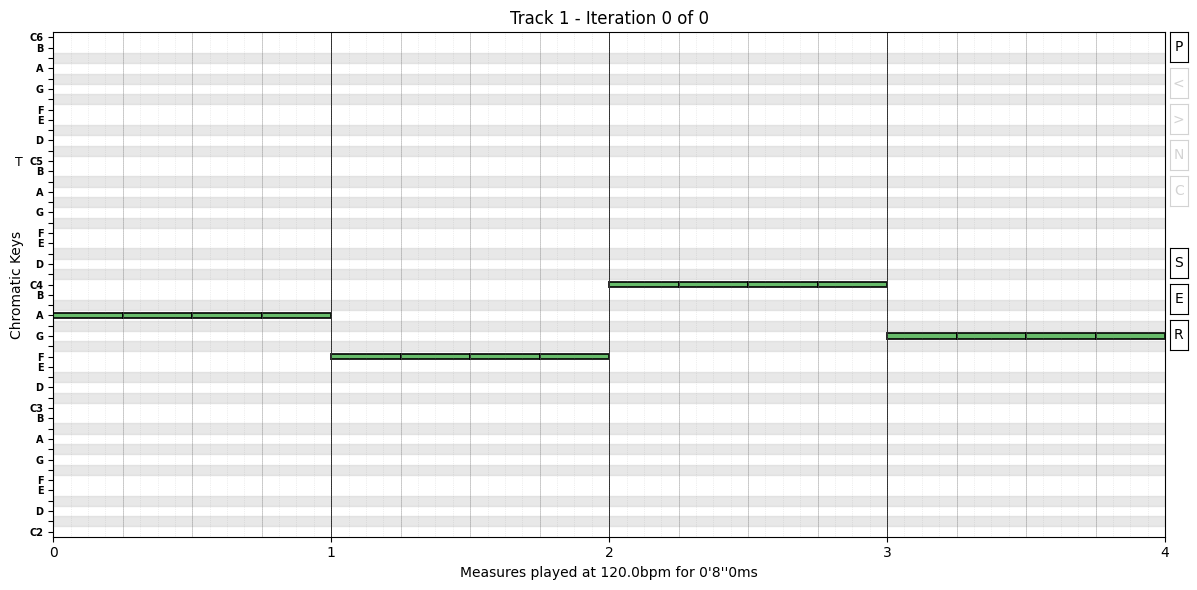

In [18]:
masked_melody >> Plot()

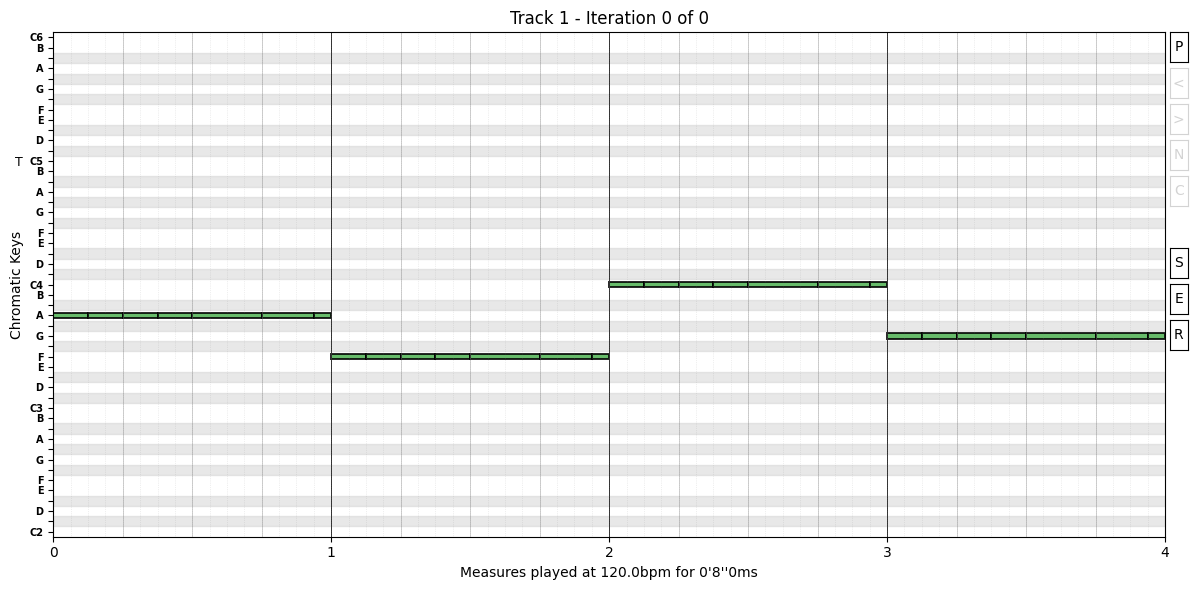

In [19]:
# Masks can't be copied, so, all operators are equivalent to their inline operator
masked_melody.mask(Or(Beat(0), Beat(1))).floordiv(Length(2))
masked_melody //= Step(15)
masked_melody >> Plot()

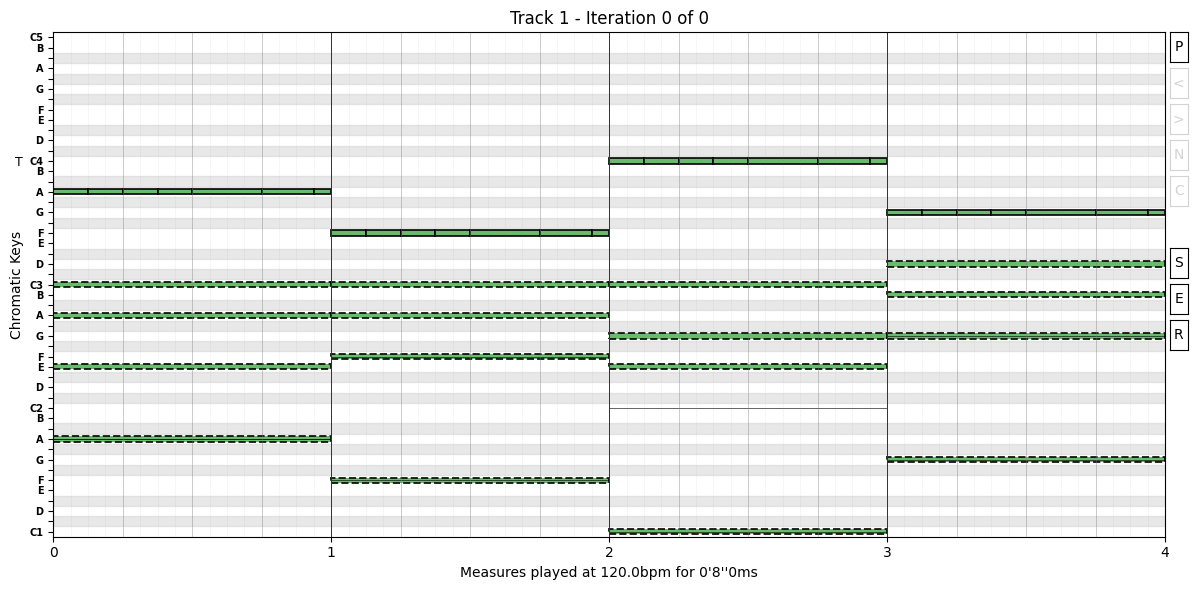

In [20]:
clip_togehter + masked_melody >> Plot()

**The problem with using `// Length` is that if repeated it will split it even more, so it's recursive**

## Using `Duration` instead of `Length` to split each `Element` in a `Clip`

The advantage of using `// Duration` is that if repeated it will **NOT** split it even more, so it's **NOT** recursive

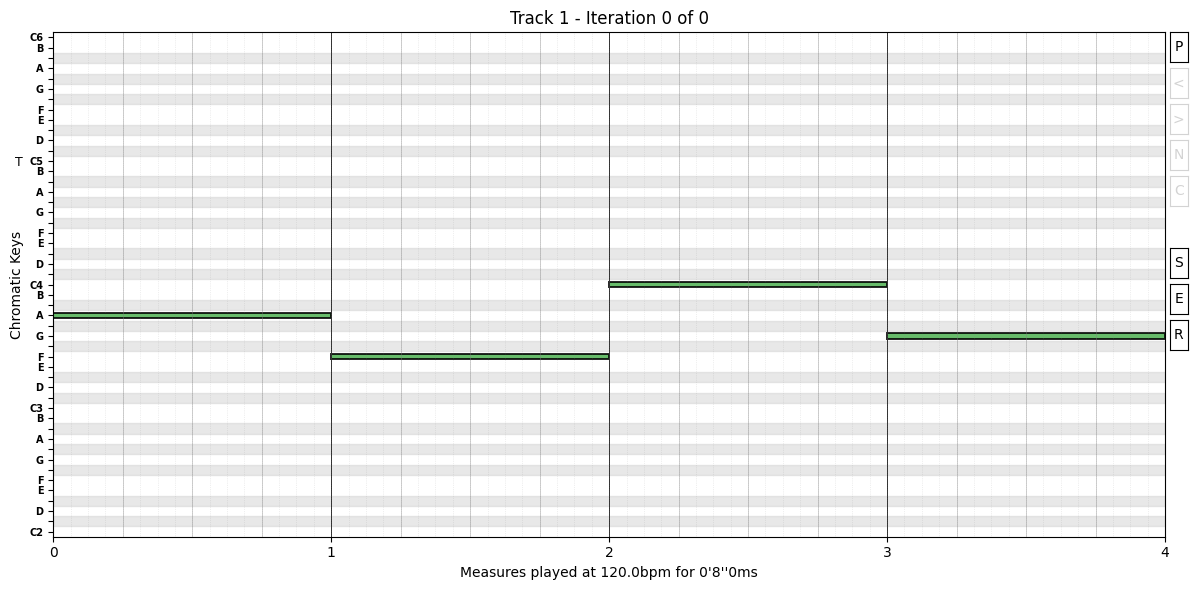

In [21]:
# Starting by creating a copy of clip_melody Clip
duration_melody = ~clip_melody       # ~ does a copy
duration_melody >> Plot()

In [22]:
# Present Chord scale in use
duration_melody[0] % Scale() % str()

'minor'

In [23]:
# It is possible to make adjustments at any point of the workflow and thus became replicated bellow
duration_melody <<= Scale("minor")   # <<= parameter is equivalent to << Pipe(parameter)
# The operator `// NoteValue` splits each Clip Element by the given `NoteValue` given to each `Element`
duration_melody //= NoteValue(1/4)

In [24]:
# Makes sure the Chord scale is indeed "minor"
duration_melody[0] % Scale() % str()

'minor'

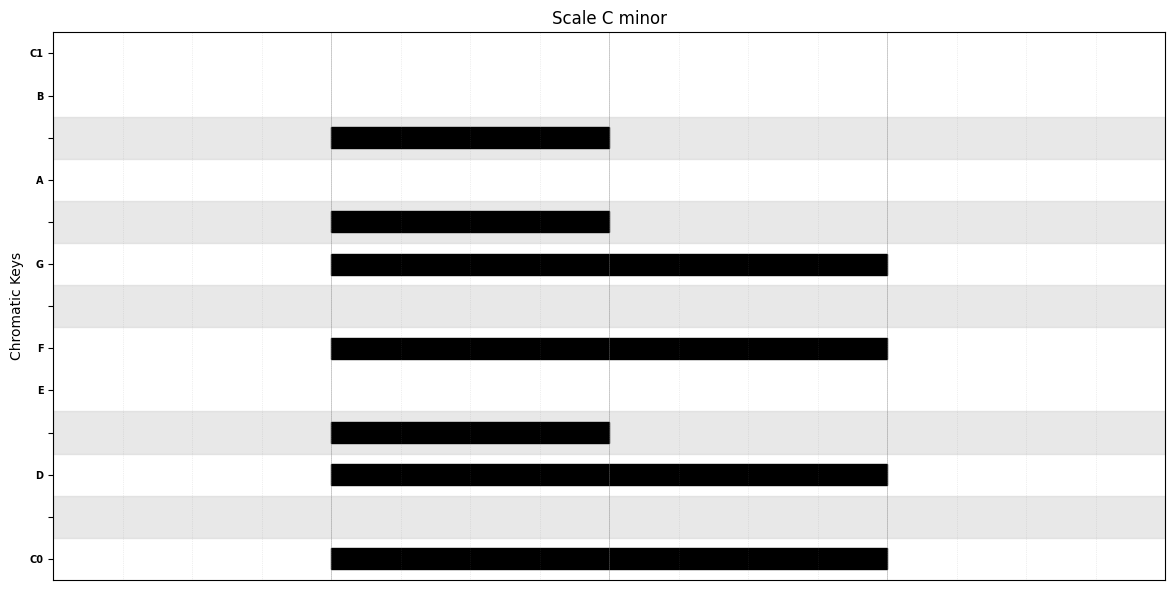

In [25]:
duration_melody[0] % Scale() >> Plot()

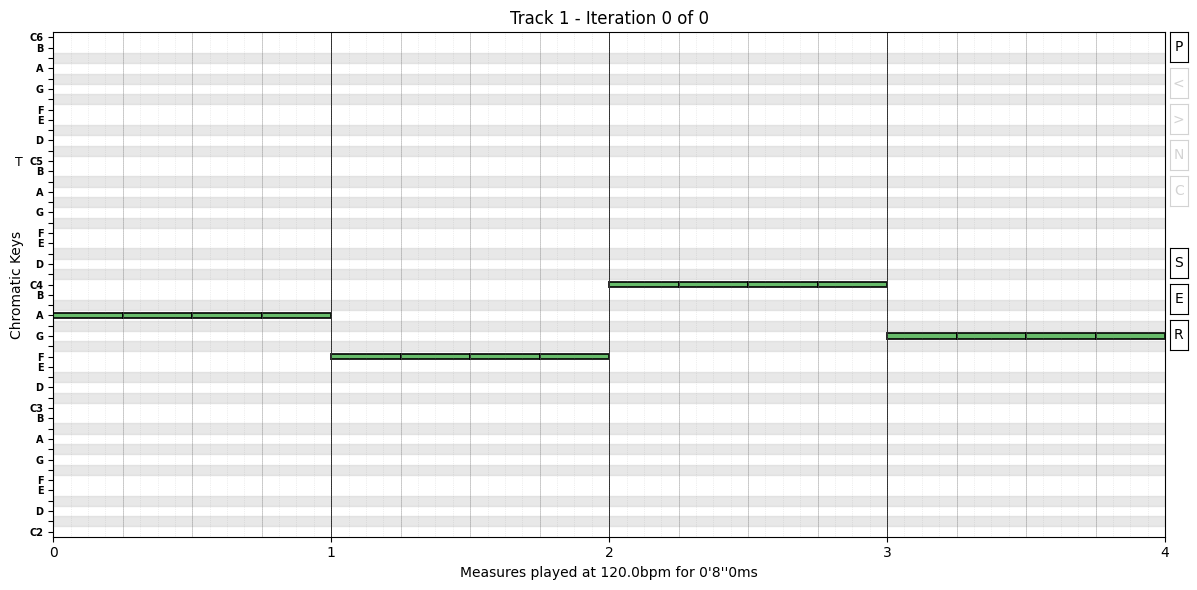

In [26]:
duration_melody >> Plot()

In [27]:
# Check which Key is the first Note
duration_melody[0] % Key() % str()

'A'

In [28]:
# Check the Degree of the first Note
duration_melody[0] % Degree() % str()

'I'

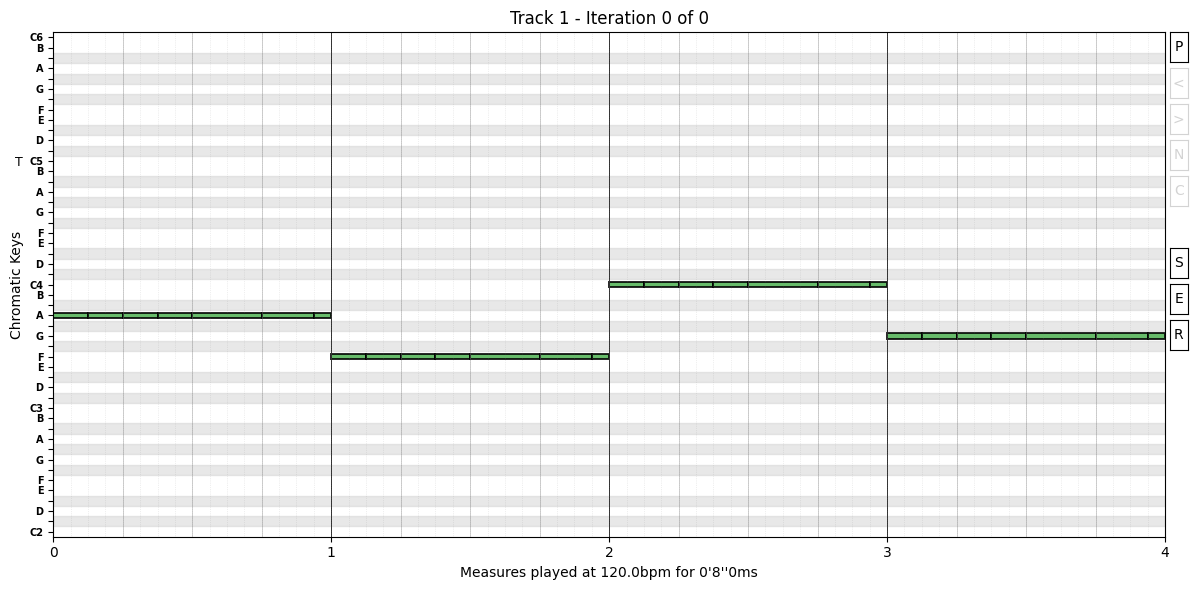

In [29]:
duration_melody //= Less(Beat(2))**NoteValue(1/8)
duration_melody //= Step(15)
duration_melody >> Plot()

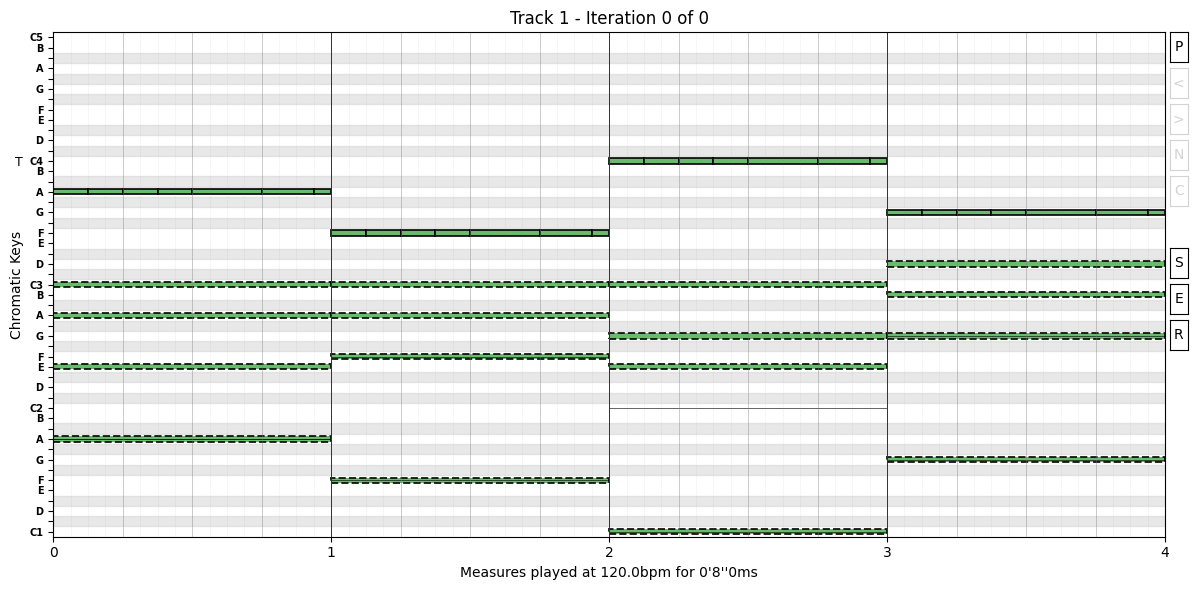

In [30]:
clip_togehter + duration_melody >> Plot()

In [31]:
# Doing `Clip >> Measure(0)` is equivalent to `Clip >> Mask(Measure(0))`
duration_melody >> Measure(0) << Once(1, 1, 3, 3, 5)**Degree() << Equal(Beats(3))**Duration(1/8)

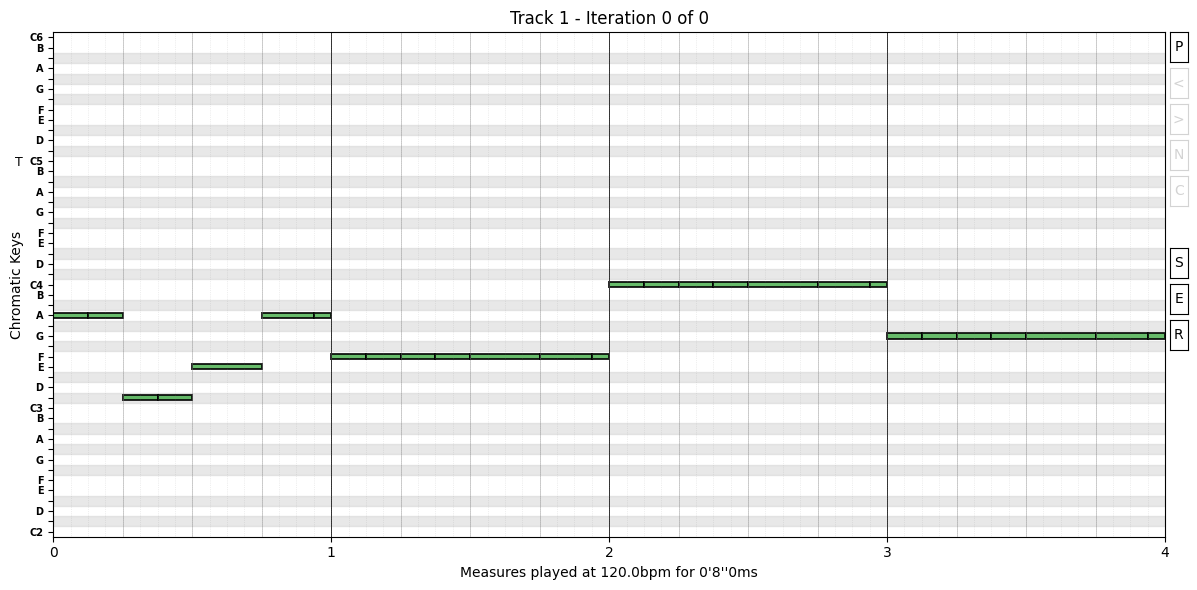

In [32]:
duration_melody >> Plot()

In [33]:
# Check multiple parameters of 3rd Note at once
duration_melody[2] % ((TonicKey(), str()), (RootKey(), str()), (TargetKey(), str()), (Degree(), str()), (Transposition(), int()), (Pitch(), float()))

('A', 'C#', 'C#', 'iii', 0, 3.0)

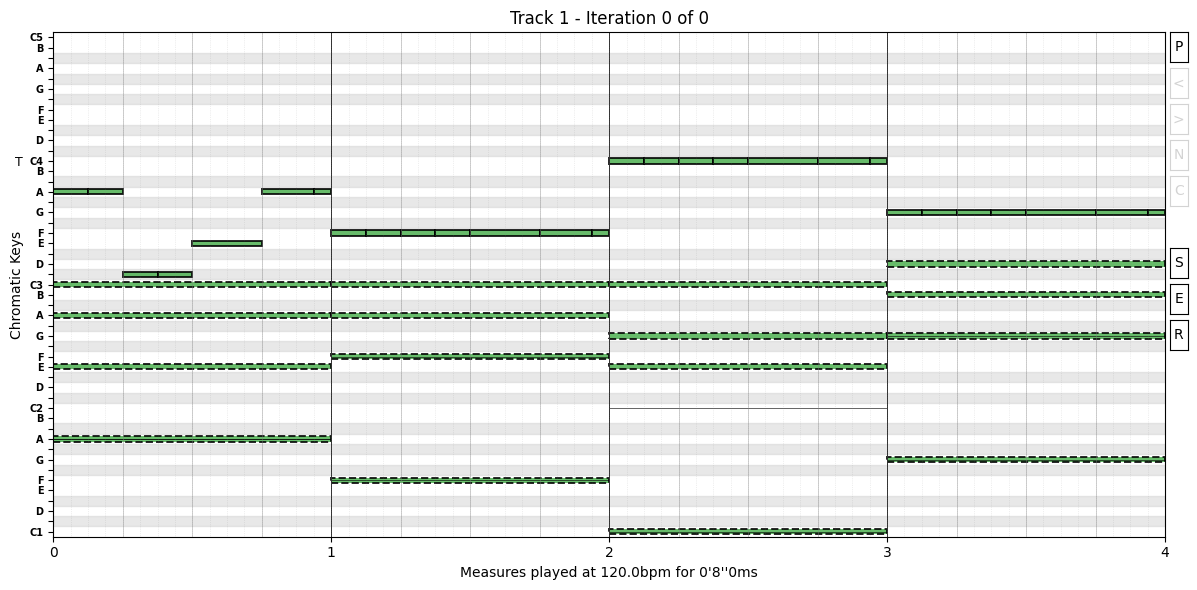

In [34]:
clip_togehter + duration_melody >> Plot()

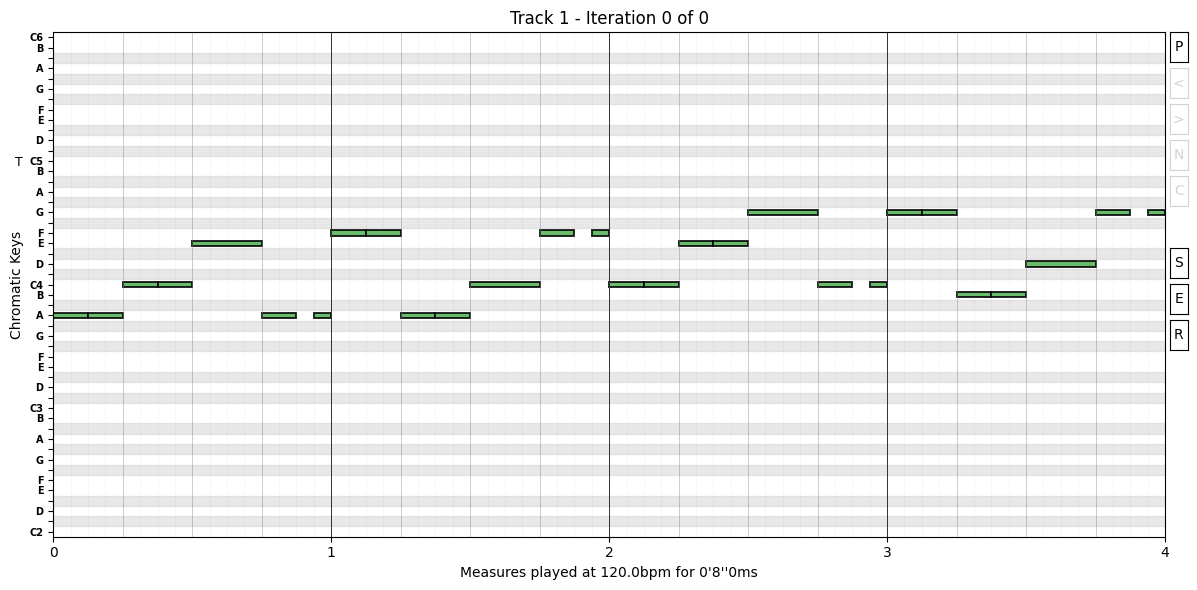

In [35]:
# Resets the Key Signature for a Major C
duration_melody << Scale(None)
# Remove all existing Degrees to start all of them at the `Tonic`
duration_melody << Degree(1)
# Sets a specific scale for each Measure
duration_melody >> Measure(0) << Scale("minor")
duration_melody >> Greater(Measure(0)) << Scale("Major")
# Tone is the key value in a single octave from 0 to 11, by setting with `<<`, it reamins in the smae `Octave`
duration_melody << Foreach(1, 1, 3, 3, 5, 1, 1)**Subtract(1)**Tones() << Equal(Step(12))**(1/8)
# This line makes sure all Notes bellow A3 will be raise up to Octave 4
duration_melody << Less(Pitch("A", Octave(3)))**Octave(4)
# Prints the result right away
duration_melody >> Plot()

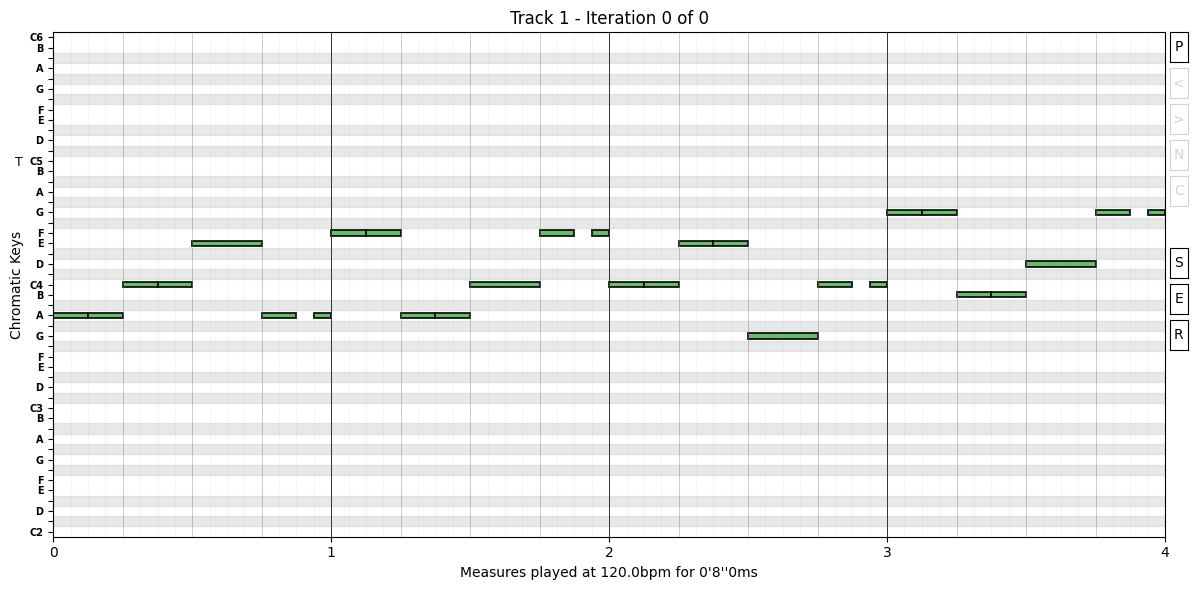

In [36]:
# Readjust Octaves based on the previous output << is better because avoid cyclic repetitions
duration_melody << Equal(Measure(2), Beat(2))**Octave(3) << Equal(Measure(3), Beat(3))**Octave(4)
# Prints the result right away
duration_melody >> Plot()

In [37]:
# Check multiple parameters of 3rd Note at once
duration_melody[2] % ((TonicKey(), str()), (RootKey(), str()), (TargetKey(), str()), (Degree(), str()), (Transposition(), int()), (Pitch(), Scale(), str()))

('A', 'A', 'C', 'I', -5, 'minor')

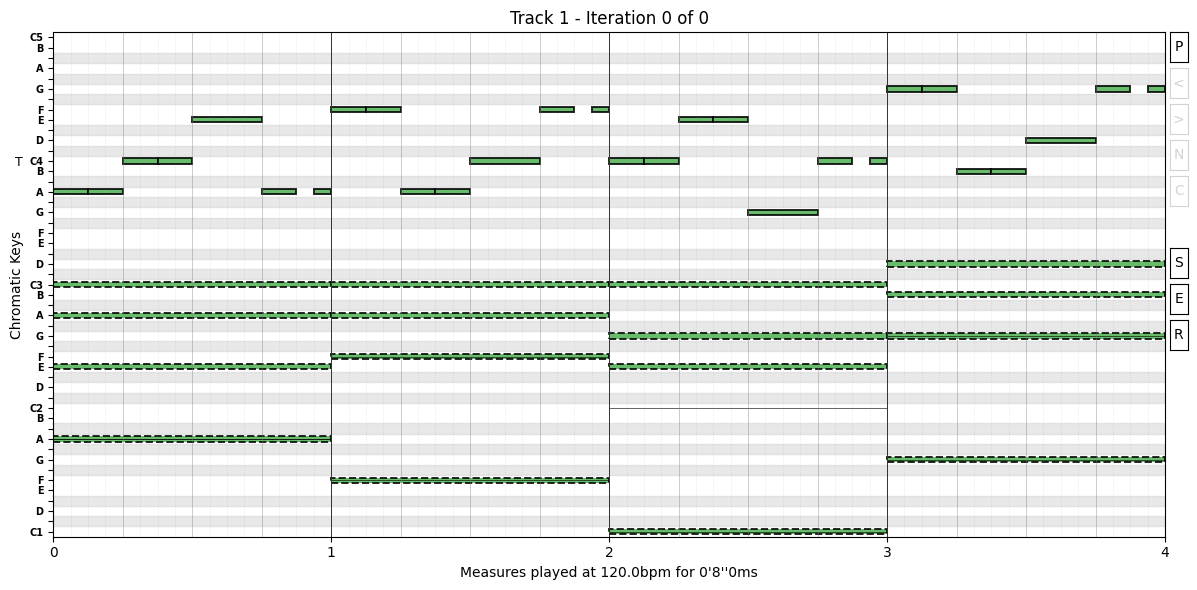

In [38]:
clip_togehter // duration_melody >> Plot()

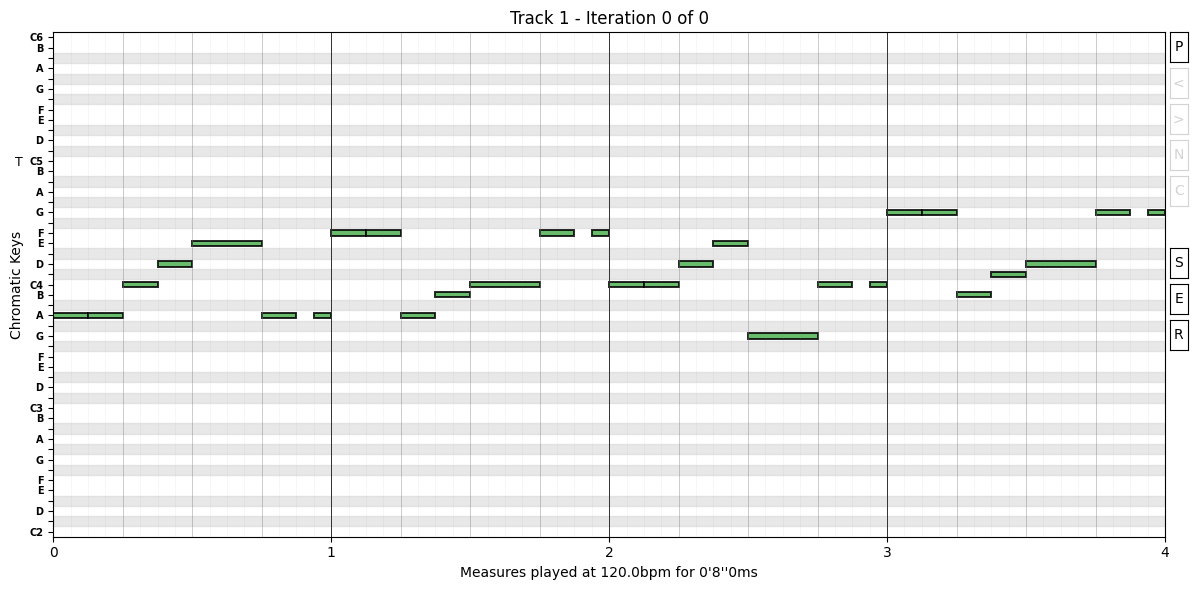

In [39]:
# Working a copy inside a cell avoids recursive operations that result in repeated actions
spiced_melody = ~duration_melody
spiced_melody += NotEqual(Measure(2))**Equal(Step(6))**Degree(1)
spiced_melody -= Equal(Measure(2), Step(4))**Transposition(1)
spiced_melody >> Plot()

In [40]:
# Check multiple parameters of 3rd Note at once
spiced_melody[10] % ((TonicKey(), str()), (RootKey(), str()), (TargetKey(), str()), (Degree(), str()), (Transposition(), int()), (Pitch(), Scale(), str()))

('F', 'G', 'B', 'ii', 2, 'Major')

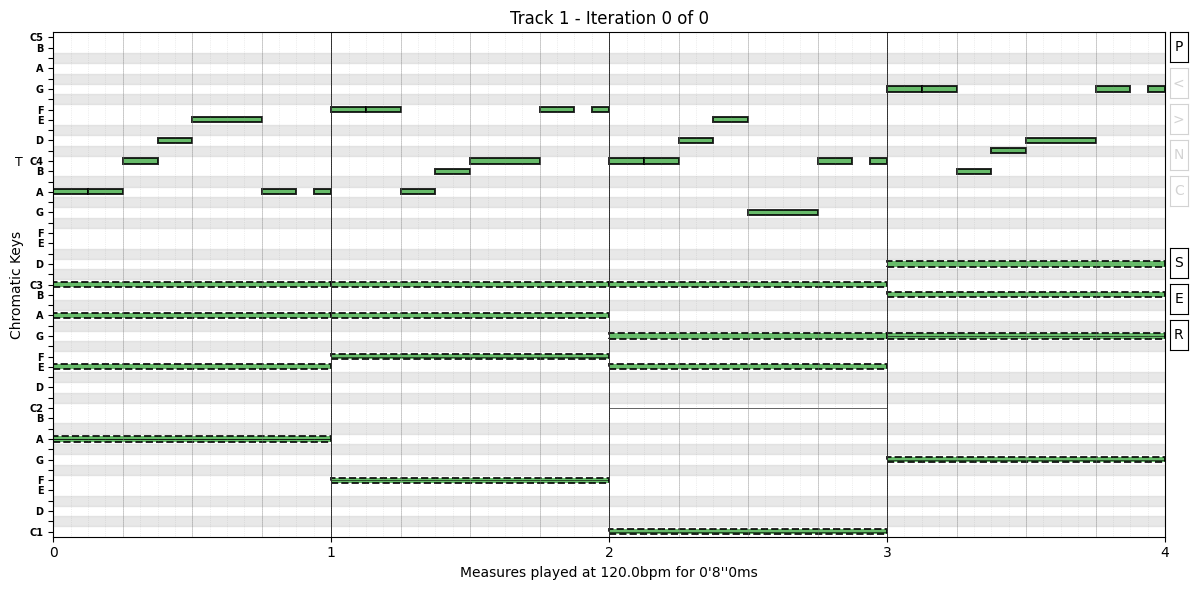

In [41]:
clip_togehter // spiced_melody >> Plot()

In [42]:
spiced_melody[0] % Pitch() % int()

57

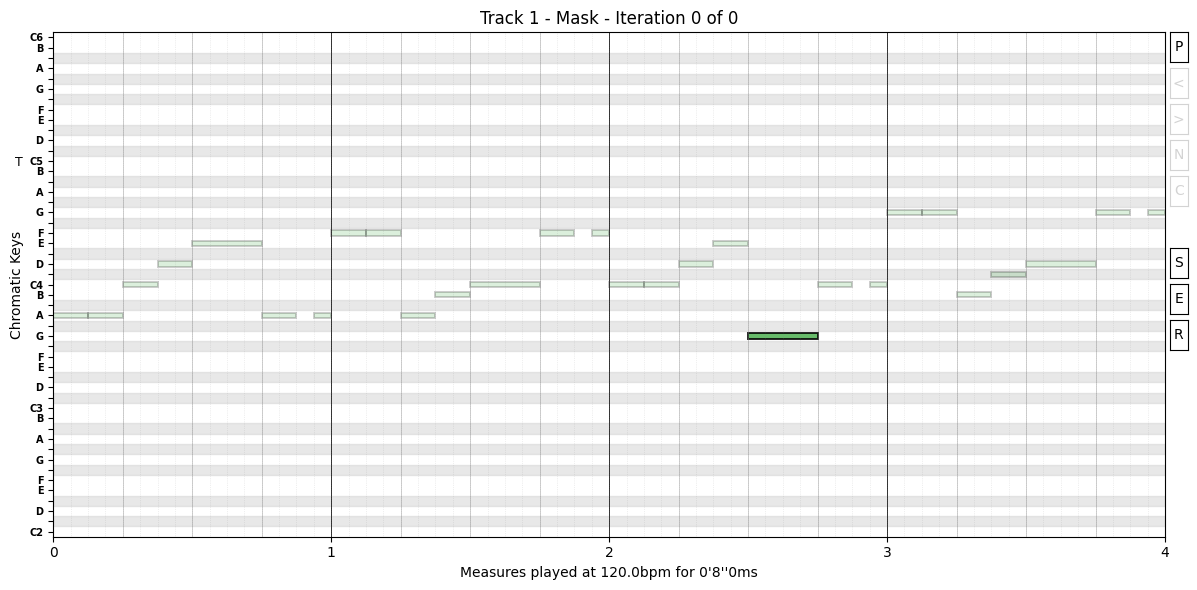

In [43]:
# Because there is conflict with the Bass Notes, whe need to move up one Octave those notes
spiced_melody.mask(Less(spiced_melody[0] % Pitch())) >> Plot()

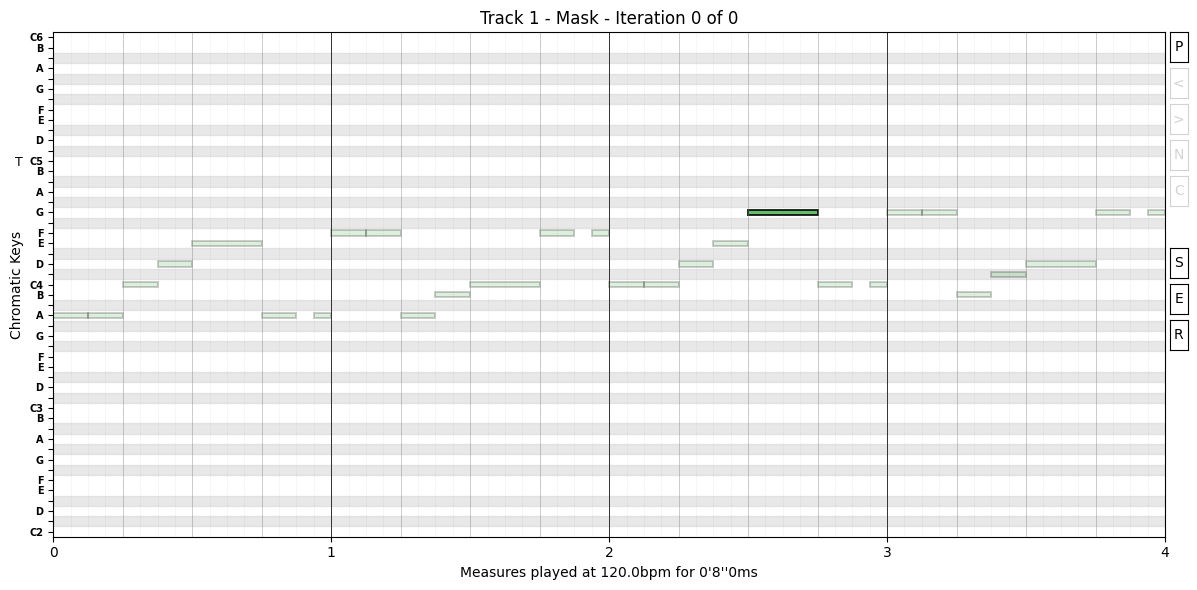

In [44]:
spiced_melody.mask(Less(spiced_melody[0] % Pitch())).add(Octave(1)) >> Plot()

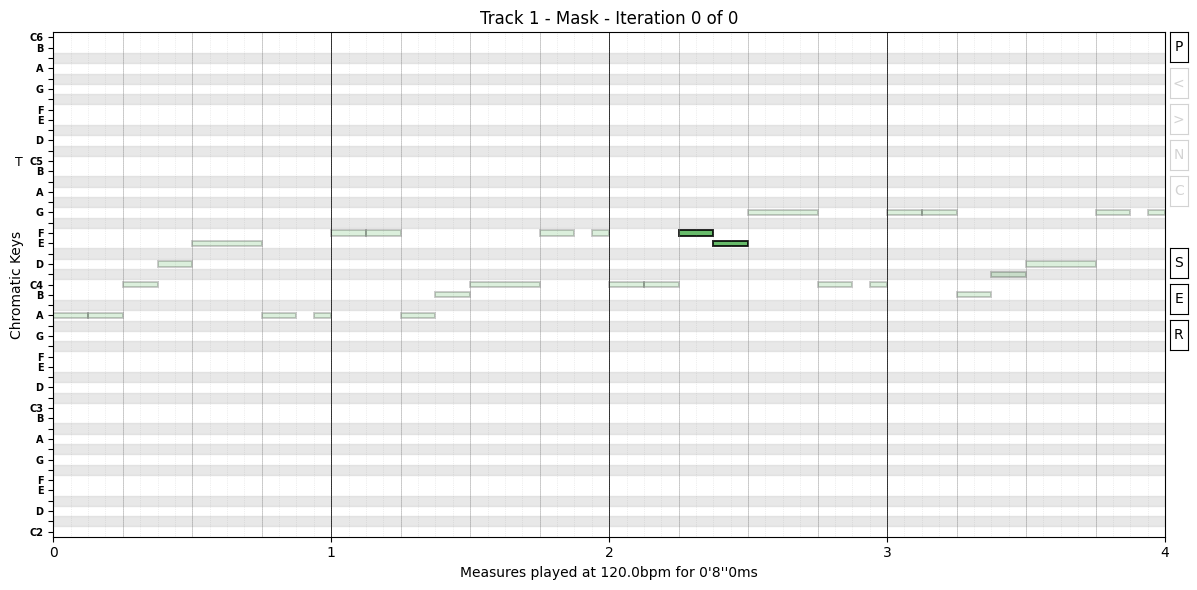

In [45]:
# Here a rotation and a tie is done while printing the mask
spiced_melody.mask(Measure(2), Beat(1)).flip().add(Transposition(1)) >> Plot()

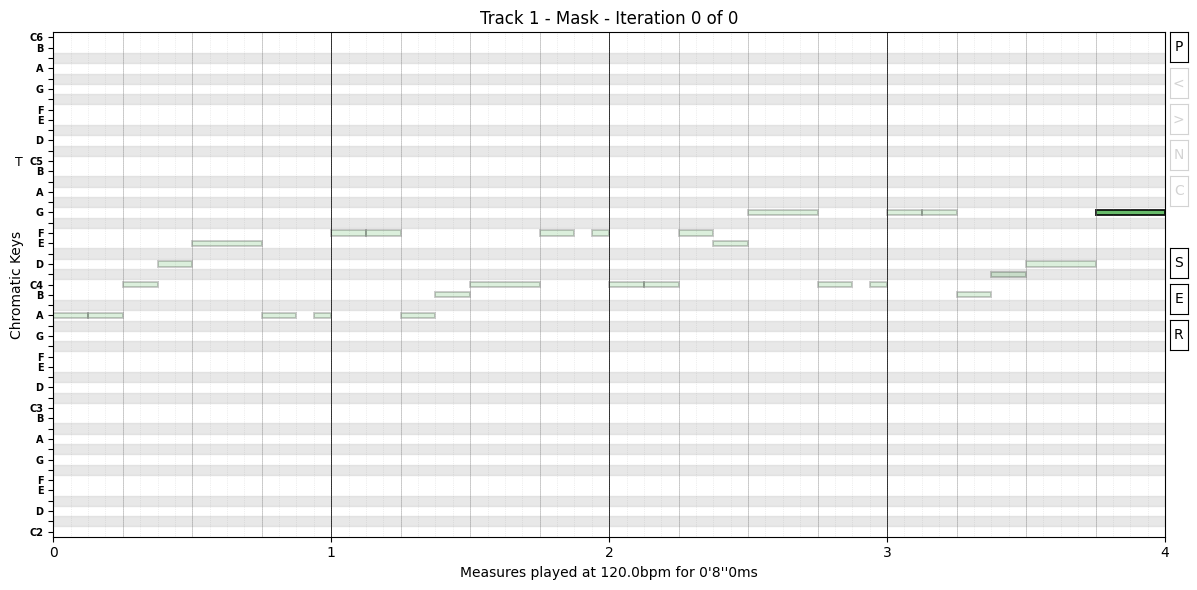

In [46]:
# Here a tie is done while printing the mask
spiced_melody.mask(Measure(3), Beat(3)).join() >> Plot()

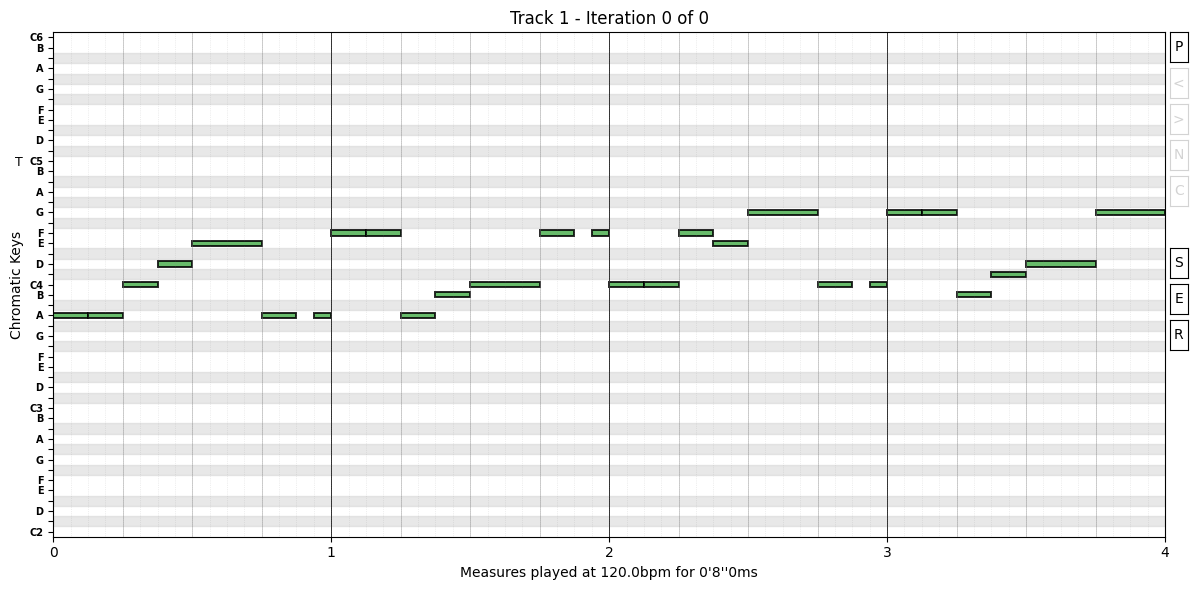

In [47]:
# Here is the final result of the Clip itself unmasked
spiced_melody >> Plot()

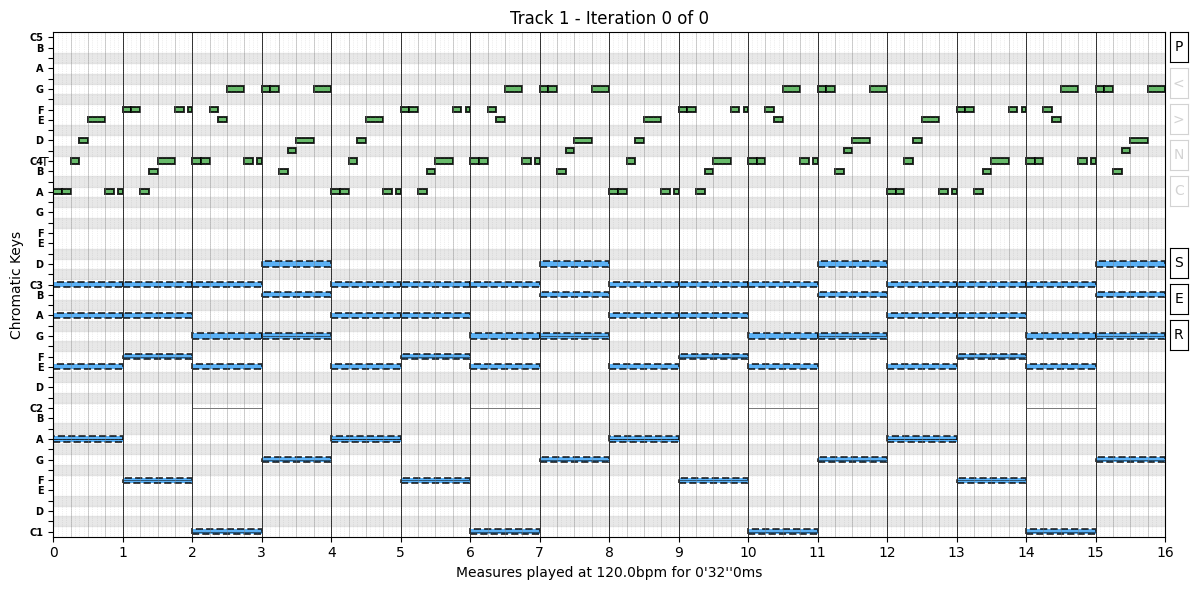

In [48]:
clip_togehter**(Velocity(80), Channel(2)) // spiced_melody * 4 >> Plot() >> Play()